<a href="https://colab.research.google.com/github/AnkitSingh-12/student-analysis/blob/main/student_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STUDENT ANALYSIS**
-------------------------------

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/student_data.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,508,male,group C,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,47.0,55.0,53.0
22072,509,female,group D,high school,free/reduced,none,married,sometimes,no,4.0,school_bus,> 10,54.0,65.0,63.0
22073,510,male,group C,some high school,standard,NaN,married,sometimes,no,4.0,school_bus,5 - 10,67.0,65.0,60.0
22074,511,female,group E,some high school,standard,completed,married,sometimes,no,1.0,private,< 5,83.0,84.0,95.0


# **NUMPY**

Q1.
Create a NumPy array for the columns MathScore, ReadingScore, and WritingScore.

Find the student with the highest total score (MathScore + ReadingScore + WritingScore).

In [ ]:
scores_array = df[['MathScore', 'ReadingScore', 'WritingScore']].values

total_scores = np.sum(scores_array, axis=1)
highest_score_index = np.argmax(total_scores)

print("Index of student with highest total score:", highest_score_index)
print("Highest total score:", total_scores[highest_score_index])


Index of student with highest total score: 22075
Highest total score: nan


Q2.Using boolean indexing in NumPy:

Find how many students have a MathScore greater than 60 and a WritingScore greater than 60.

In [ ]:
math_greater_60 = scores_array[:, 0] > 60
writing_greater_60 = scores_array[:, 2] > 60

both_greater_60 = math_greater_60 & writing_greater_60

num_students = np.sum(both_greater_60)

print("Number of students with MathScore > 60 and WritingScore > 60:", num_students)


Number of students with MathScore > 60 and WritingScore > 60: 12913


Q3.Using NumPy, create a new array for students who use school_bus as TransportMeans.

Find the average Math Score for these students.

In [ ]:
school_bus_students = df['TransportMeans'] == 'school_bus'

math_scores_school_bus = df.loc[school_bus_students, 'MathScore'].values


average_math_score = np.mean(math_scores_school_bus)

print("Average Math Score for students using school bus:", average_math_score)


Average Math Score for students using school bus: 66.72588306416789


Q4.Filter the students whose parents have a master's degree.

Using NumPy, find their average ReadingScore.

In [ ]:

masters_degree_students = df['ParentEduc'] == "master's degree"

reading_scores_masters = df.loc[masters_degree_students, 'ReadingScore'].values

average_reading_score = np.mean(reading_scores_masters)

print("Average Reading Score for students whose parents have a master's degree:", average_reading_score)


Average Reading Score for students whose parents have a master's degree: 76.06195286195286


Q5.For all students, calculate a new array:

Average_Score = (MathScore + ReadingScore + WritingScore) / 3
Using NumPy array operations, find how many students have an Average_Score greater than 75

In [ ]:
average_scores = np.mean(scores_array, axis=1)
above_75 = average_scores > 75
num_students_above_75 = np.sum(above_75)
print("Number of students with Average_Score > 75:", num_students_above_75)


Number of students with Average_Score > 75: 7287


Q6.Using NumPy, find the maximum, minimum, and mean values of "WritingScore".

In [ ]:
writing_scores = df['WritingScore'].values
max_writing_score = np.max(writing_scores)
min_writing_score = np.min(writing_scores)
mean_writing_score = np.mean(writing_scores)

print("Maximum Writing Score:", max_writing_score)
print("Minimum Writing Score:", min_writing_score)
print("Mean Writing Score:", mean_writing_score)


Maximum Writing Score: nan
Minimum Writing Score: nan
Mean Writing Score: nan


Q7.
Create a pivot table showing average ReadingScore by Gender and LunchType.

(Hint: use pivot_table().)

In [ ]:
pivot_table = df.pivot_table(values='ReadingScore', index='Gender', columns='LunchType', aggfunc='mean')
pivot_table


LunchType,free/reduced,standard
Gender,,
female,67.707598,75.604264
male,60.747974,68.697214


Q8.
Sort the df by MathScore descending and then by ReadingScore ascending for students with LunchType "standard".

In [ ]:
standard_lunch = df[df['LunchType'] == 'standard']
sorted_df = standard_lunch.sort_values(by=['MathScore', 'ReadingScore'], ascending=[False, True])
sorted_df


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
18389,560,male,group E,some college,standard,none,single,sometimes,no,4.0,private,5 - 10,100.0,73.0,76.0
10535,153,male,group E,master's degree,standard,completed,single,regularly,yes,3.0,private,NaN,100.0,78.0,91.0
10120,698,male,group E,bachelor's degree,standard,none,married,regularly,no,2.0,school_bus,> 10,100.0,80.0,88.0
12454,216,male,group E,some college,standard,NaN,married,regularly,no,NaN,school_bus,5 - 10,100.0,80.0,78.0
15172,103,male,group E,some college,standard,none,widowed,regularly,no,1.0,NaN,5 - 10,100.0,80.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,391,female,NaN,some college,standard,completed,divorced,sometimes,yes,1.0,private,< 5,22.0,34.0,36.0
15133,56,female,group B,some high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,22.0,35.0,34.0
21556,950,female,group C,some high school,standard,none,single,regularly,no,1.0,private,> 10,21.0,35.0,31.0
4311,551,female,group C,high school,standard,none,married,sometimes,yes,1.0,school_bus,5 - 10,21.0,37.0,38.0


# **PANDAS**

Q1.Find out the number of missing/null values in each column.

In [ ]:
print(df.isnull().sum())


Unnamed: 0                0
Gender                    0
EthnicGroup            1299
ParentEduc             1339
LunchType                 0
TestPrep               1319
ParentMaritalStatus     861
PracticeSport           461
IsFirstChild            696
NrSiblings             1127
TransportMeans         2265
WklyStudyHours          684
MathScore                 1
ReadingScore              1
WritingScore              1
dtype: int64


Q2.Group the dataset by a categorical column and find the average of a numerical column.

In [ ]:
average_math_by_parent_education = df.groupby('ParentEduc')['MathScore'].mean()
average_math_by_parent_education


,MathScore
ParentEduc,
associate's degree,68.381731
bachelor's degree,70.560064
high school,64.434051
master's degree,72.454545
some college,66.349019
some high school,62.650699


Q3.
Display the first 10 rows of the DataFrame.
(Use .head() method.)

In [ ]:
df.head(10)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73.0,84.0,79.0
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85.0,93.0,89.0
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41.0,43.0,39.0
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65.0,64.0,68.0
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37.0,59.0,50.0


Q4.
How many unique values are there in the EthnicGroup column?
(Use .nunique().)

In [ ]:
df['EthnicGroup'].nunique()
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,508,male,group C,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,47.0,55.0,53.0
22072,509,female,group D,high school,free/reduced,none,married,sometimes,no,4.0,school_bus,> 10,54.0,65.0,63.0
22073,510,male,group C,some high school,standard,NaN,married,sometimes,no,4.0,school_bus,5 - 10,67.0,65.0,60.0
22074,511,female,group E,some high school,standard,completed,married,sometimes,no,1.0,private,< 5,83.0,84.0,95.0


Q5.
Create a new column called TotalScore which is the sum of MathScore, ReadingScore, and WritingScore.
(Use df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore'].)

In [ ]:
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,216.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0,247.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,271.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0,143.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,508,male,group C,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,47.0,55.0,53.0,155.0
22072,509,female,group D,high school,free/reduced,none,married,sometimes,no,4.0,school_bus,> 10,54.0,65.0,63.0,182.0
22073,510,male,group C,some high school,standard,NaN,married,sometimes,no,4.0,school_bus,5 - 10,67.0,65.0,60.0,192.0
22074,511,female,group E,some high school,standard,completed,married,sometimes,no,1.0,private,< 5,83.0,84.0,95.0,262.0


Q6.Group the data by Gender and find the average ReadingScore for each gender.
(Use .groupby('Gender')['ReadingScore'].mean().)

In [ ]:
average_reading_by_gender = df.groupby('Gender')['ReadingScore'].mean()
average_reading_by_gender


,ReadingScore
Gender,
female,72.843009
male,65.906663


Q7.
Find the percentage of students who have LunchType as "standard" and PracticeSport as "regularly".
*(Hint: combine conditions and calculate (count/total)100.)

In [ ]:
lunch_sport_df = df[(df['LunchType'] == 'standard') & (df['PracticeSport'] == 'regularly')]
percentage = (len(lunch_sport_df) / len(df)) * 100
df


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,216.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0,247.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,271.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0,143.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,508,male,group C,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,47.0,55.0,53.0,155.0
22072,509,female,group D,high school,free/reduced,none,married,sometimes,no,4.0,school_bus,> 10,54.0,65.0,63.0,182.0
22073,510,male,group C,some high school,standard,NaN,married,sometimes,no,4.0,school_bus,5 - 10,67.0,65.0,60.0,192.0
22074,511,female,group E,some high school,standard,completed,married,sometimes,no,1.0,private,< 5,83.0,84.0,95.0,262.0


Q8.
Find the Ethnic Group that has the highest average WritingScore.

In [ ]:
average_writing_by_ethnic_group = df.groupby('EthnicGroup')['WritingScore'].mean()
highest_average_writing_group = average_writing_by_ethnic_group.idxmax()
df


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,216.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0,247.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,271.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0,143.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,508,male,group C,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,47.0,55.0,53.0,155.0
22072,509,female,group D,high school,free/reduced,none,married,sometimes,no,4.0,school_bus,> 10,54.0,65.0,63.0,182.0
22073,510,male,group C,some high school,standard,NaN,married,sometimes,no,4.0,school_bus,5 - 10,67.0,65.0,60.0,192.0
22074,511,female,group E,some high school,standard,completed,married,sometimes,no,1.0,private,< 5,83.0,84.0,95.0,262.0


Q9.
Standardize the LunchType column to contain only 'standard' and 'free/reduced'. Any unknown or missing values should be replaced with 'unknown'.

In [ ]:
df.loc[df['LunchType'] == 'standard', 'LunchType'] = 'standard'


df.loc[df['LunchType'] == 'free/reduced', 'LunchType'] = 'free/reduced'

df.loc[~df['LunchType'].isin(['standard', 'free/reduced']), 'LunchType'] = 'unknown'
df


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,216.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0,247.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,271.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0,143.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,508,male,group C,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,47.0,55.0,53.0,155.0
22072,509,female,group D,high school,free/reduced,none,married,sometimes,no,4.0,school_bus,> 10,54.0,65.0,63.0,182.0
22073,510,male,group C,some high school,standard,NaN,married,sometimes,no,4.0,school_bus,5 - 10,67.0,65.0,60.0,192.0
22074,511,female,group E,some high school,standard,completed,married,sometimes,no,1.0,private,< 5,83.0,84.0,95.0,262.0


Q10.
Create a new boolean column IsClean that is True for rows with no missing values and False otherwise.

In [ ]:
df['IsClean'] = ~df.isnull().any(axis=1)
df


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,IsClean
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,216.0,False
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69.0,90.0,88.0,247.0,False
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,271.0,True
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45.0,56.0,42.0,143.0,False
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,229.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,508,male,group C,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,47.0,55.0,53.0,155.0,True
22072,509,female,group D,high school,free/reduced,none,married,sometimes,no,4.0,school_bus,> 10,54.0,65.0,63.0,182.0,True
22073,510,male,group C,some high school,standard,NaN,married,sometimes,no,4.0,school_bus,5 - 10,67.0,65.0,60.0,192.0,False
22074,511,female,group E,some high school,standard,completed,married,sometimes,no,1.0,private,< 5,83.0,84.0,95.0,262.0,True


# **MATPLOTLIB**

Q7.
Plot a bar plot showing the count of students for each LunchType.
(Use df['LunchType'].value_counts().plot(kind='bar').)

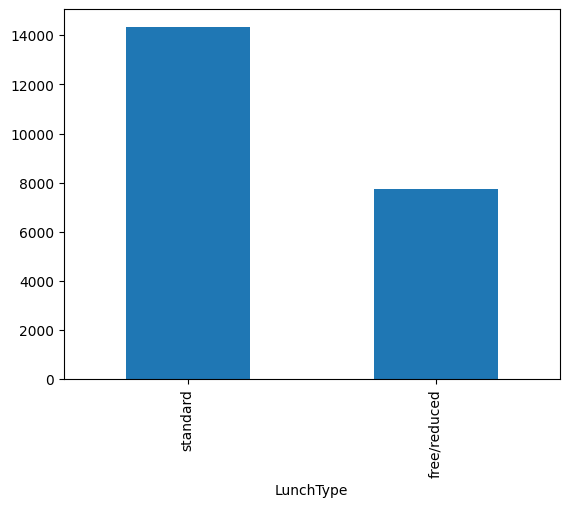

In [ ]:
df['LunchType'].value_counts().plot(kind='bar')
plt.show()


Q2. Plot a bar plot showing average MathScore by Parent Education Level.
🟨 Plot: bar (use groupby() + mean())



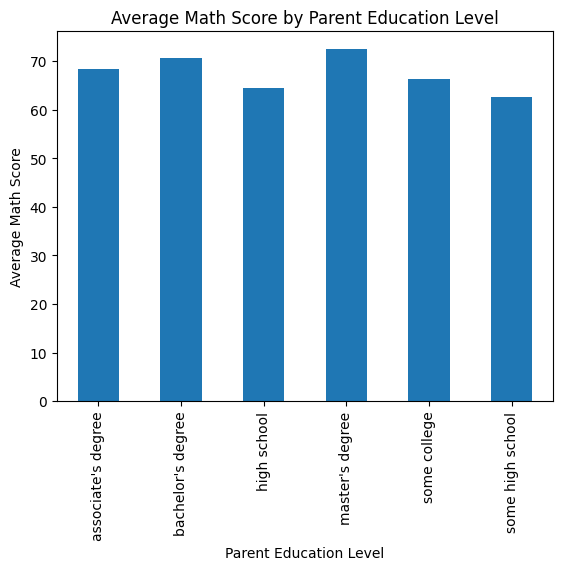

In [ ]:

average_math_by_parent_education = df.groupby('ParentEduc')['MathScore'].mean()
average_math_by_parent_education.plot(kind='bar')
plt.xlabel('Parent Education Level')
plt.ylabel('Average Math Score')
plt.title('Average Math Score by Parent Education Level')
plt.show()


Q3. Plot a pie chart to show the proportion of students in each EthnicGroup.
🟩 Plot: pie (after value_counts())

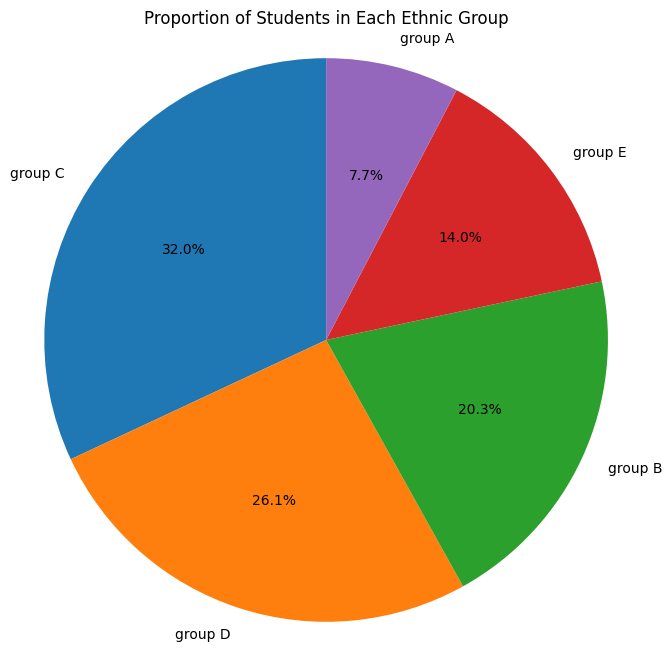

In [ ]:
ethnic_group_counts = df['EthnicGroup'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ethnic_group_counts, labels=ethnic_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Students in Each Ethnic Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Q4. Create a scatter plot of ReadingScore vs. WritingScore.
🟨 Plot: scatter



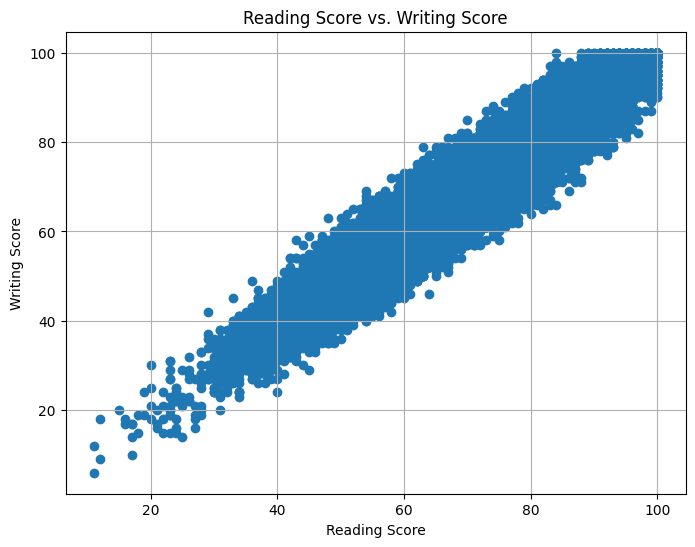

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ReadingScore'], df['WritingScore'])
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Reading Score vs. Writing Score')
plt.grid(True)
plt.show()


Q5. Create a multi-line plot showing MathScore, ReadingScore, and WritingScore averages by WklyStudyHours.

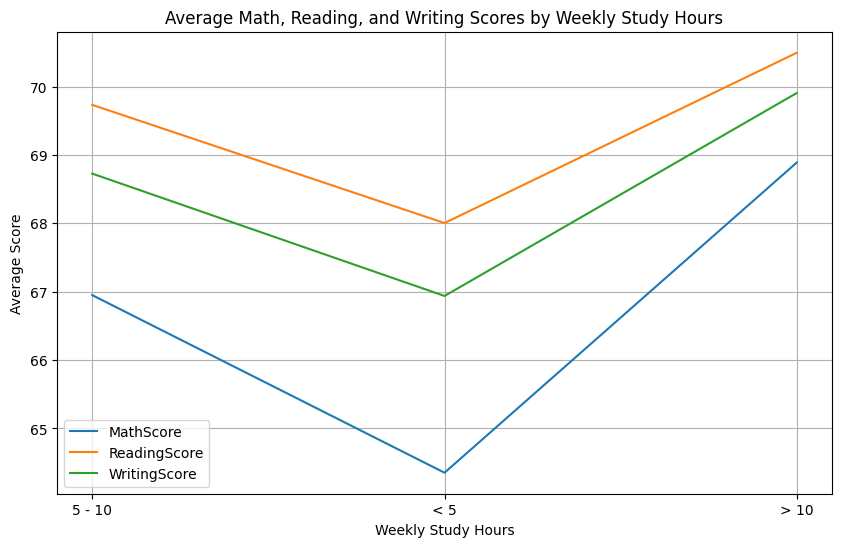

In [ ]:
average_scores_by_study_hours = df.groupby('WklyStudyHours')[['MathScore', 'ReadingScore', 'WritingScore']].mean()


plt.figure(figsize=(10, 6))
plt.plot(average_scores_by_study_hours.index, average_scores_by_study_hours['MathScore'], label='MathScore')
plt.plot(average_scores_by_study_hours.index, average_scores_by_study_hours['ReadingScore'], label='ReadingScore')
plt.plot(average_scores_by_study_hours.index, average_scores_by_study_hours['WritingScore'], label='WritingScore')

plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.title('Average Math, Reading, and Writing Scores by Weekly Study Hours')
plt.legend()
plt.grid(True)
plt.show()


Q6. Visualize the distribution of total scores (Math + Reading + Writing) using KDE plot (Seaborn) and overlay a vertical line for the mean.

<ipython-input-26-7b33005bc589>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalScore'], shade=True)


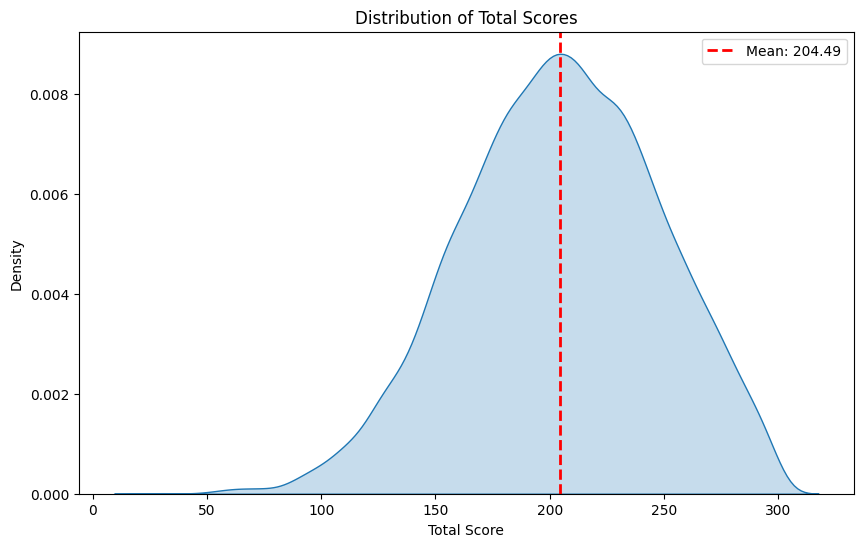

In [ ]:
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']
mean_total_score = df['TotalScore'].mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['TotalScore'], shade=True)
plt.axvline(mean_total_score, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_total_score:.2f}')
plt.xlabel('Total Score')
plt.ylabel('Density')
plt.title('Distribution of Total Scores')
plt.legend()
plt.show()


 Q7.Create an annotated scatter plot of ReadingScore vs WritingScore, where each point’s color and size reflects MathScore.

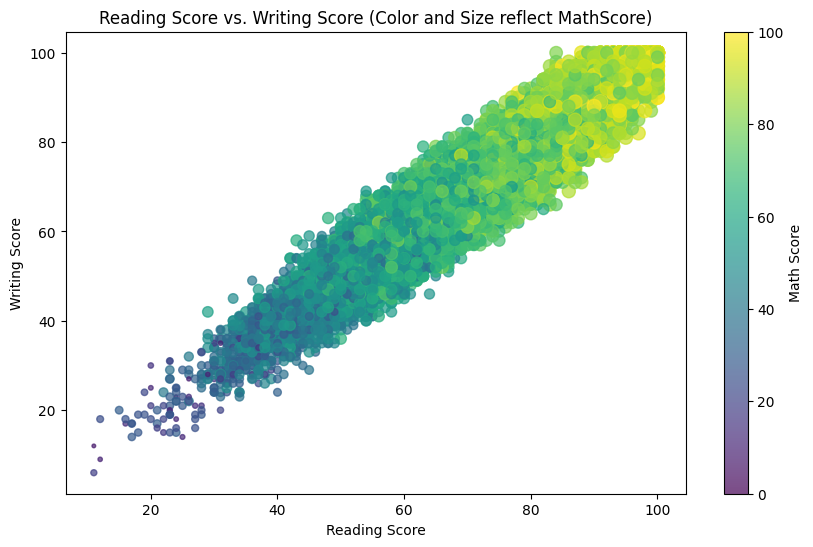

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ReadingScore'], df['WritingScore'], c=df['MathScore'], s=df['MathScore'], alpha=0.7)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Reading Score vs. Writing Score (Color and Size reflect MathScore)')
plt.colorbar(label='Math Score')
plt.show()


Q8. Use subplot with shared axes to compare score distributions (Math, Reading, Writing) with individual histograms on each subplot.

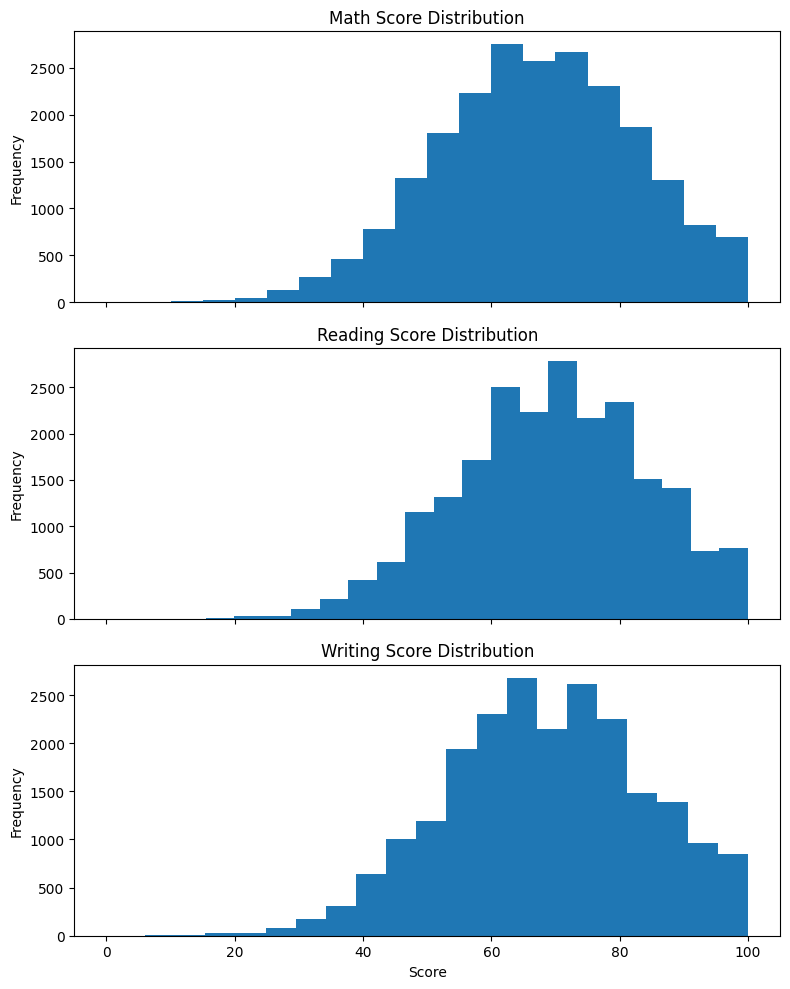

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
axes[0].hist(df['MathScore'], bins=20)
axes[0].set_ylabel('Frequency')
axes[0].set_title('Math Score Distribution')

axes[1].hist(df['ReadingScore'], bins=20)
axes[1].set_ylabel('Frequency')
axes[1].set_title('Reading Score Distribution')

axes[2].hist(df['WritingScore'], bins=20)
axes[2].set_xlabel('Score')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Writing Score Distribution')

plt.tight_layout()
plt.show()


# **SEABORN**

 Q1.Create a 2x2 subplot grid using plt.subplots() with the following:

MathScore histogram

ReadingScore KDE plot

WritingScore violin plot by Gender

Countplot of LunchType

<ipython-input-29-253b66da063f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='WritingScore', data=df, ax=axes[1, 0], palette='Set2')
<ipython-input-29-253b66da063f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LunchType', data=df, ax=axes[1, 1], palette='viridis')


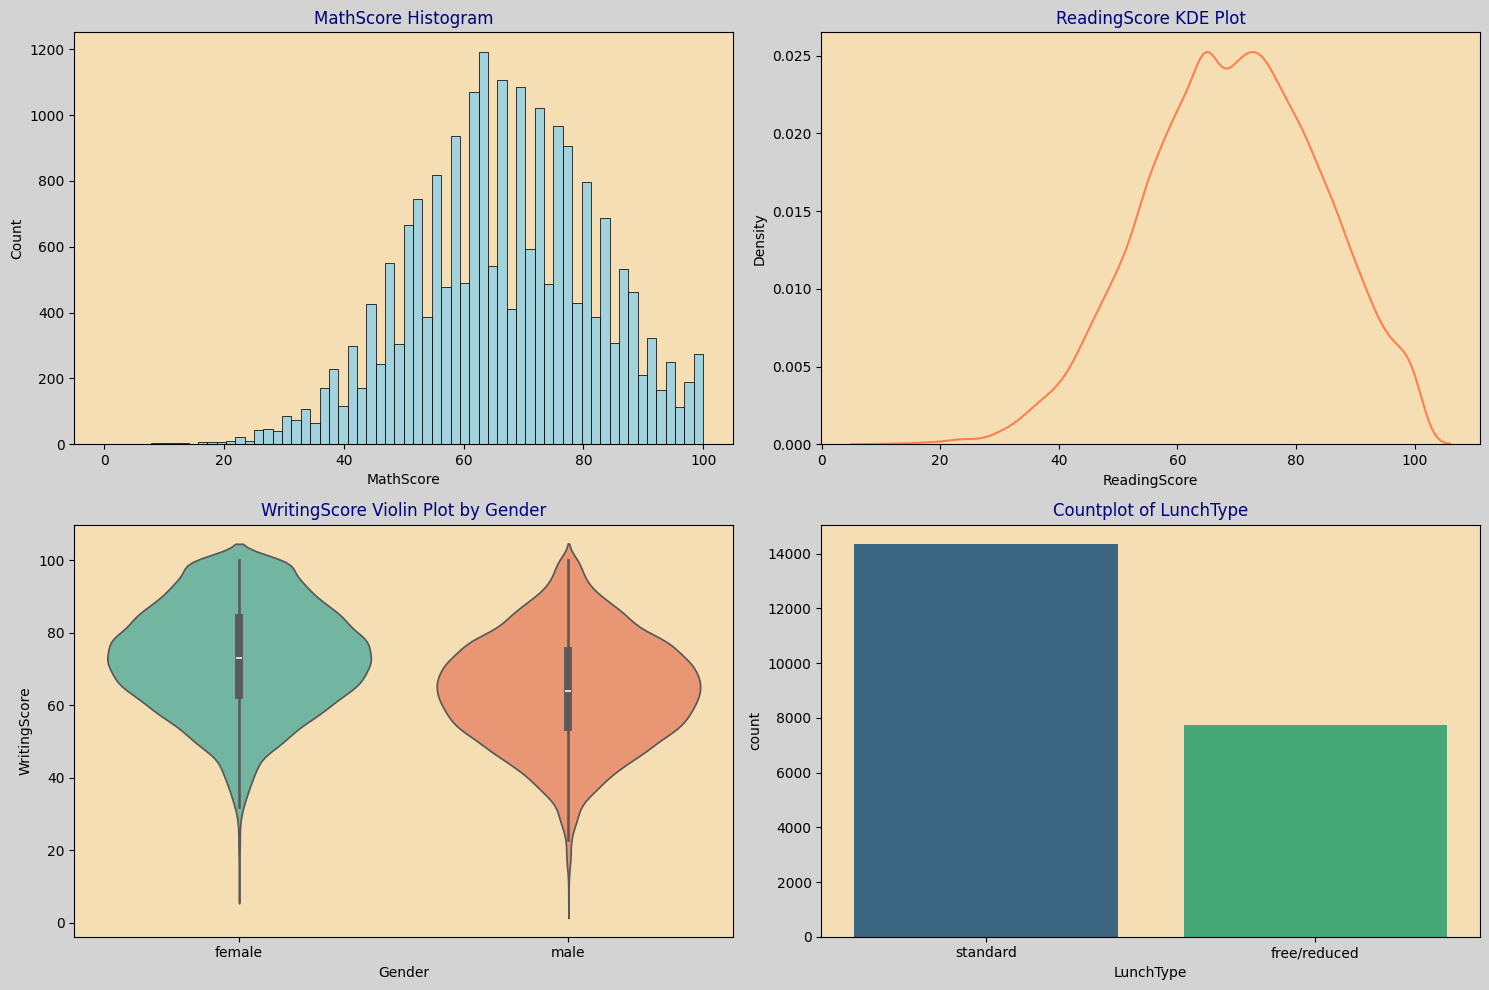

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), facecolor='lightgray')


sns.histplot(df['MathScore'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('MathScore Histogram', color='navy')
axes[0, 0].set_facecolor('wheat')  # Set subplot background color


sns.kdeplot(df['ReadingScore'], ax=axes[0, 1], color='coral')
axes[0, 1].set_title('ReadingScore KDE Plot', color='navy')
axes[0, 1].set_facecolor('wheat')

sns.violinplot(x='Gender', y='WritingScore', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('WritingScore Violin Plot by Gender', color='navy')
axes[1, 0].set_facecolor('wheat')


sns.countplot(x='LunchType', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Countplot of LunchType', color='navy')
axes[1, 1].set_facecolor('wheat')

plt.tight_layout()
plt.show()


Q2.Create a combined figure using sns.scatterplot() for ReadingScore vs WritingScore, sized by MathScore and colored by Gender.

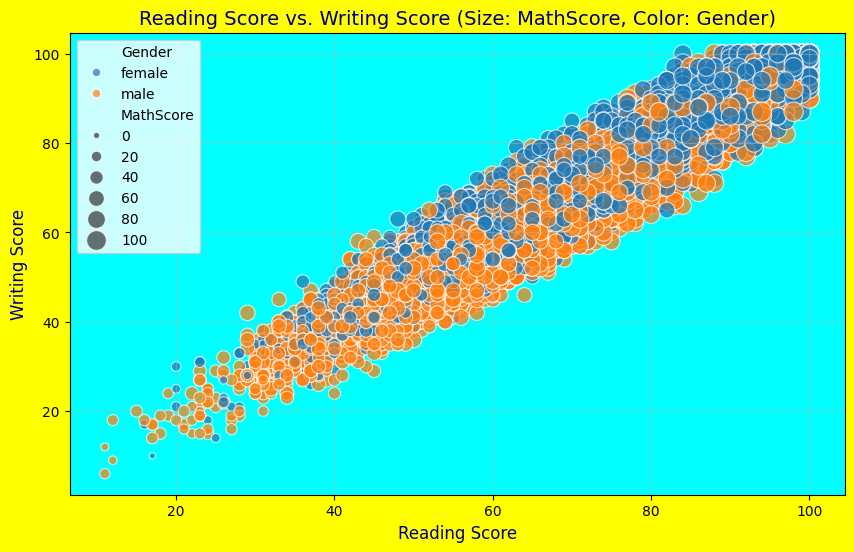

In [ ]:
plt.figure(figsize=(10, 6), facecolor='yellow')
sns.scatterplot(x='ReadingScore', y='WritingScore', data=df, hue='Gender', size='MathScore', sizes=(20, 200), alpha=0.7)
ax=plt.gca()
ax.set_facecolor('cyan')
plt.xlabel('Reading Score', fontsize=12, color='navy')
plt.ylabel('Writing Score', fontsize=12, color='navy')
plt.title('Reading Score vs. Writing Score (Size: MathScore, Color: Gender)', fontsize=14, color='navy')
plt.grid(True, alpha=0.5)
plt.show()


Q4.Use boxplot() to compare MathScore across different WklyStudyHours intervals (e.g., group hours).



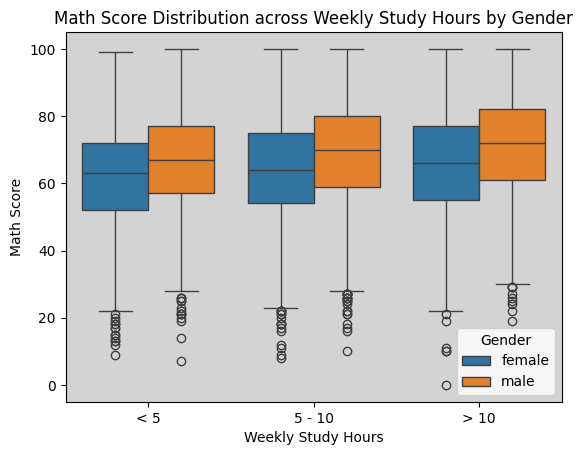

In [ ]:
sns.boxplot(x='WklyStudyHours', y='MathScore', hue='Gender', data=df)  # Add hue='Gender'
plt.gca().set_facecolor('lightgray')

plt.xlabel('Weekly Study Hours')
plt.ylabel('Math Score')


plt.title('Math Score Distribution across Weekly Study Hours by Gender')


plt.legend(title='Gender')


plt.show()



Q5. Create a correlation heatmap of all numerical features (MathScore, ReadingScore, WritingScore, NrSiblings, etc.) using sns.heatmap() to analyze the relationships between academic performance and other numeric attributes.

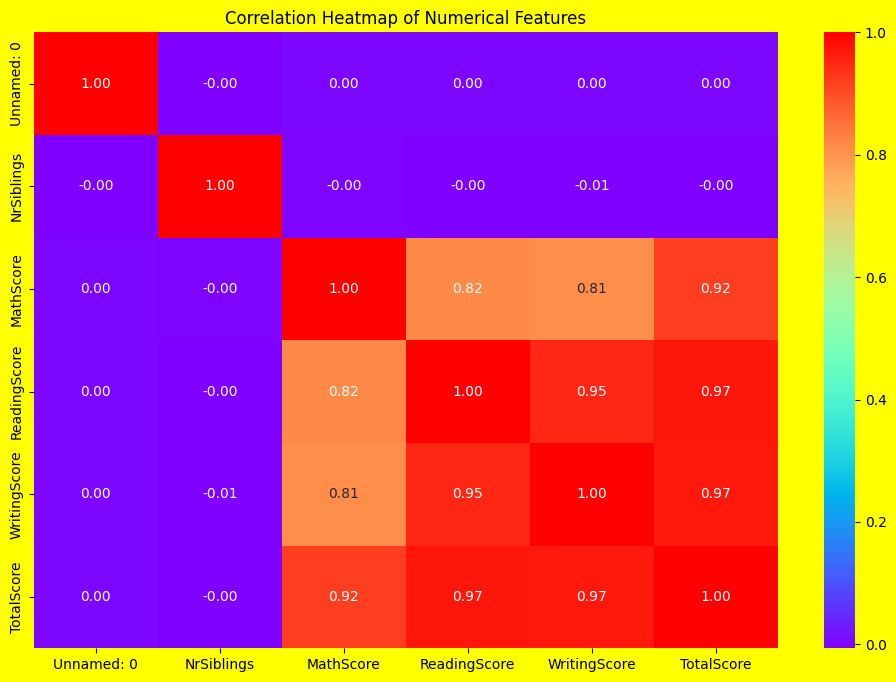

In [ ]:
numeric_features = df.select_dtypes(include=np.number)
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(12, 8),facecolor='yellow')
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow',linecolor='black', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Q2. Plot a pivot-based heatmap showing the average MathScore by Gender and LunchType. Use pivot_table() to aggregate data and visualize it using seaborn.heatmap() with annotations.

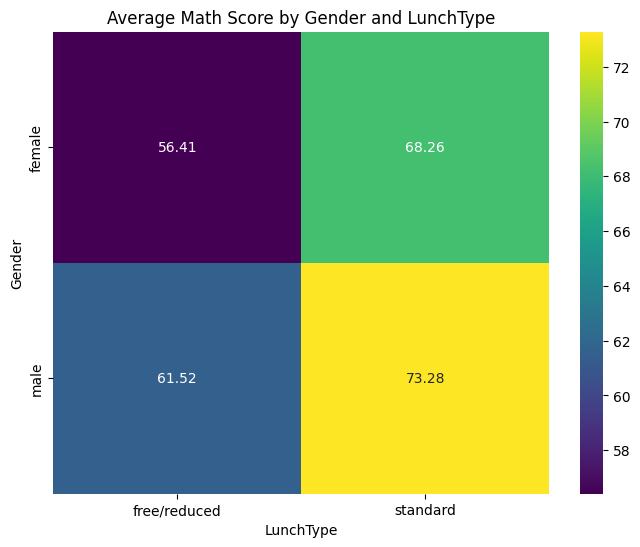

In [ ]:
pivot_table = df.pivot_table(values='MathScore', index='Gender', columns='LunchType', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Math Score by Gender and LunchType')
plt.show()


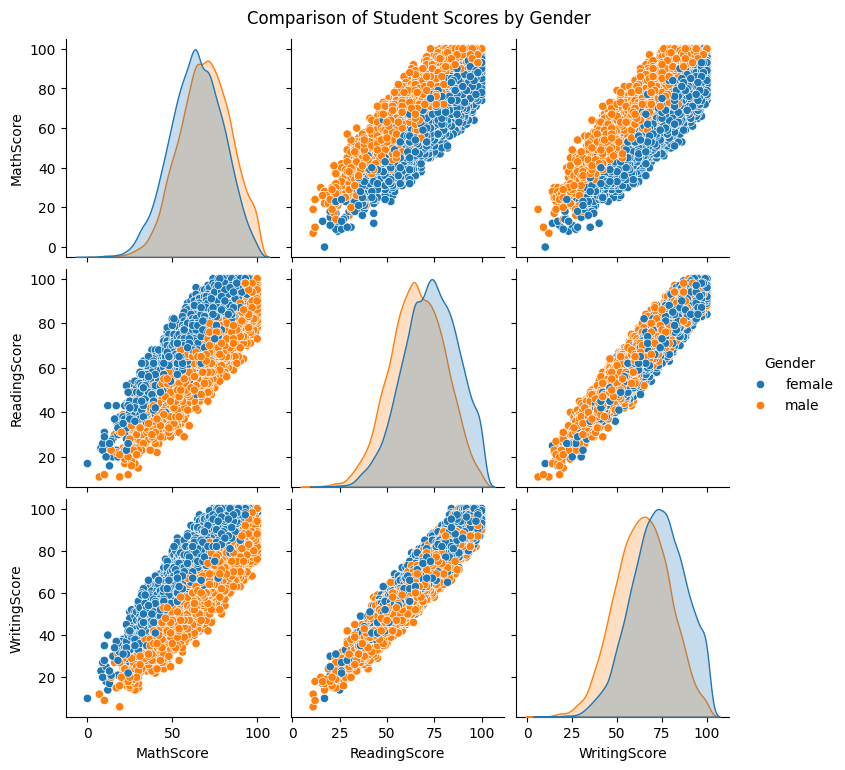

In [ ]:
sns.pairplot(df[['MathScore', 'ReadingScore', 'WritingScore', 'Gender']], hue='Gender')

plt.suptitle('Comparison of Student Scores by Gender', y=1.02)
plt.show()


# **CONCLUSION**

The comprehensive analysis of student performance data reveals meaningful insights into how demographic and lifestyle factors influence academic achievement. Key indicators such as gender, parental education, test preparation, and lunch type significantly impact student outcomes in Math, Reading, and Writing.

Students whose parents possess higher educational qualifications tend to perform better across all subjects, indicating a strong influence of educational background. Similarly, those who completed test preparation programs show marked improvements in their Reading and Writing scores. Gender-based trends reveal that while males generally excel in Math, females tend to outperform in Reading and Writing, suggesting the need for balanced subject support.

Lunch type emerges as a socio-economic indicator; students receiving standard lunch generally achieve higher scores, highlighting potential disparities linked to nutrition and access. Moreover, students engaged in regular physical activity or those who practice sports “regularly” tend to have slightly better performance, underscoring the value of a well-rounded lifestyle.

Visual tools like heatmaps, pairplots, and violin plots provided clarity in identifying correlations and patterns. This analysis offers actionable insights for educators and stakeholders to design targeted interventions, promote equal opportunities, and enhance overall student development.